# PYTHON-17. Как получать данные из веб-источников и API 

## 1. Введение

Из предыдущих модулей вы узнали, как получать данные, когда они хранятся в файлах разных форматов. В реальных проектах данные, как правило, не содержатся в готовом виде в каком-то файле — для анализа необходимо предварительно их собрать, например скопировав с какого-нибудь стороннего веб-сайта.

В этом модуле мы рассмотрим, как с помощью Python можно упростить сбор информации из интернета и, в некоторых случаях, получить доступ к данным, которые невозможно «собрать руками». В частности, мы:
* рассмотрим, в каком виде информация обычно находится в интернете;
* напишем программы, которые собирают данные с веб-сайтов, используя библиотеки requests и BeautifulSoup;
* разберёмся, что такое программный интерфейс веб-сервисов (API) и как его использовать (для примера мы будем собирать данные в социальной сети ВКонтакте).

К концу изучения модуля вы сможете писать программы, которые избавят вас от многих часов монотонной работы и расширят спектр собираемой информации.

## 2. Веб-запросы

Процесс получения/извлечения информации с веб-ресурсов в интернете называется web-scraping (рус. веб-скрейпинг/веб-скрапинг). Веб-скрапинг может быть проделан вручную пользователем компьютера, однако этот термин обычно связывают с автоматизированными процессами, реализованными с помощью кода.

Какие данные можно извлечь в процессе веб-скрапинга?

* цены на товары конкурентов для оптимизации своей стратегии ценообразования;
* сообщения в социальных медиа, по которым можно отслеживать тренды в той или иной области;
* отзывы о товарах/услугах компании на различных площадках, которые можно впоследствии анализировать;
* контактные данные пользователей соцсетей или форумов для дальнейшего взаимодействия с этими пользователями;
и т.д.

Для того чтобы веб-скрапинг был возможен, необходимо подключение компьютера, который будет задействован в этом процессе, к сети Интернет.

Интернет — это глобальная информационная сеть, которая позволяет компьютерам по всему миру обмениваться информацией. Один компьютер (называемый клиентом) отправляет запрос в определённом формате другому компьютеру (называемому сервером) и получает ответ (текст, изображение, видео и т. д.).

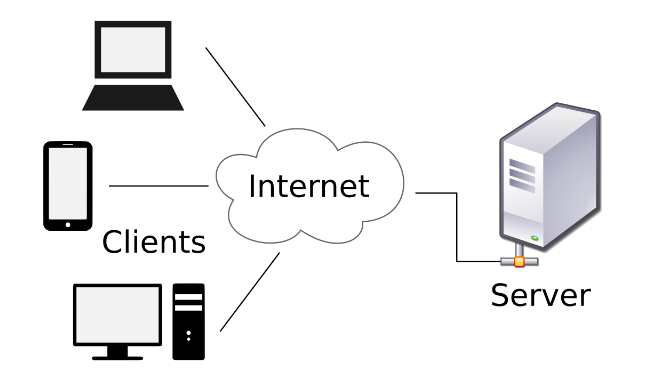

Клиент и сервер взаимодействуют между собой, обмениваясь одиночными сообщениями (не потоком данных) посредством сетевых протоколов, которые формализуют общение между ними. В настоящее время повсеместно используемый протокол в интернете, позволяющий клиенту получать различные ресурсы (например, HTML-документы), — это протокол HTTP.

Запрос, отправляемый клиентом с использованием протокола HTTP, состоит из нескольких элементов:

* адрес, по которому идёт обращение (например, www.google.com);
* техническая информация, например метод запроса;
* дополнительные данные, например если загружается (передаётся) изображение.

Адрес — это URL, Uniform Resource Locator (с англ. Унифицированный Указатель Ресурса).

Ответ, в свою очередь, состоит из следующих элементов:

* код статуса ответа: например, 200 («успешно»), 404 («не найден») и т. д. (более полный список кодов статуса ответа можете посмотреть, перейдя по ссылке https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%BA%D0%BE%D0%B4%D0%BE%D0%B2_%D1%81%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D1%8F_HTTP);
* текст в запрошенном формате (HTML, XML, JSON и т. д.) или мультимедийные файлы;
* прочая техническая информация.

### МЕТОДЫ ЗАПРОСОВ В ПРОТОКОЛЕ HTTP

Для того чтобы указать серверу на то, какое действие мы хотим произвести с ресурсом, в протоколе HTTP используются так называемые методы. В HTTP существует несколько методов, которые описывают действия с ресурсами. Чаще всего используются GET и POST.

GET — ПОЛУЧЕНИЕ РЕСУРСА

Метод GET запрашивает информацию из указанного источника и не может влиять на его содержимое. Запрос доступен для кэширования данных (то есть для сохранения, восстановления и дальнейшего использования) и добавления в закладки. Длина запроса ограничена (максимальная длина — 2048 символов).

Пример GET-запроса, отправляемого через адресную строку браузера:

 http://site.ru/page.php?name=dima&age=27

POST — СОЗДАНИЕ РЕСУРСА

Метод POST используется для отправки данных, которые могут оказывать влияние на содержимое ресурса. В отличие от метода GET, запросы POST не могут быть кэшированы, они не остаются в истории браузера и их нельзя добавить в закладки. Длина запроса POST не ограничивается.

Пример POST-запроса, отправляемого через форму запроса:

POST / HTTP/1.0\r\n  
Host: www.site.ru\r\n  
Referer: http://www.site.ru/index.html\r\n  
Cookie: income=1\r\n  
Content-Type: application/x-www-form-urlencoded\r\n  
Content-Length: 35\r\n  
\r\n  
login=Dima&password=12345  

ДОПОЛНИТЕЛЬНО

Подробнее про методы HTTP можете прочитать, перейдя по этой ссылке https://developer.mozilla.org/ru/docs/Web/HTTP/Methods.

Эти знания пригодятся нам с вами в дальнейшем при подготовке запросов на получение информации от сервера и анализе полученных от него ответов.

## 3. Библиотека requests

В стандартной библиотеке Python для отправки веб-запросов существует функция urllib2, но большинство разработчиков используют стороннюю библиотеку requests (c англ. запросы), потому что её работа более стабильна, а созданный с её помощью код получается проще. Поэтому мы будем работать с библиотекой requests, а urllib2 рассматривать не будем.

Познакомимся с библиотекой requests, решив простую задачу — получить значения курсов валют. Курс валют — полезная и регулярно обновляемая информация, но каждый раз в ручном режиме получать информацию о курсе интересующей валюты трудоёмко.

Разработаем код, так называемый скрипт (англ. script, рус. сценарий), — небольшую программу, которая содержит последовательность действий для автоматического выполнения задачи.

С помощью скрипта мы будем в удобном виде выгружать информацию по курсам валют с заранее выбранного сайта.

Один из сайтов в интернете, на котором информация о курсах валют дублирует информацию с сайта Центрального Банка России, — ресурс Курсы валют ЦБ РФ https://www.cbr.ru/ в XML и JSON. На данном ресурсе информация о курсах валют https://www.cbr-xml-daily.ru/ представлена в разных форматах, в том числе и в структурированном JSON-формате, методы работы с которым мы изучили в одном из предыдущих модулей.

Перед началом работы библиотеку requests потребуется установить. Например, в Jupyter Notebook это делается с помощью такой команды:

In [8]:
# Устанавливаем библиотеку requests
# %pip install requests

Как только библиотека установлена, импортируем её и отправим наш первый запрос к ресурсу Курсы валют ЦБ РФ в XML и JSON. Используем метод get() из библиотеки requests, передав ему соответствующий URL —  https://www.cbr-xml-daily.ru/daily_json.js:

In [9]:
import requests # Импортируем библиотеку requests
url = 'https://www.cbr-xml-daily.ru/daily_json.js' # Определяем значение URL страницы для запроса
response = requests.get(url) # Делаем GET-запрос к ресурсу и результат ответа сохраняем в переменной response

Проверим ответ сервера — содержимое переменной response:

In [10]:
print(response) # Выводим значение response на экран как объект

<Response [200]>


Мы получили объект ответа Response, который содержит всю нужную нам информацию. По умолчанию в квадратных скобках на экран выводится код статуса ответа. В данном случае он равен 200 — то есть запрос был корректным и сервер отдал нам нужную информацию. Значение кода статуса 404 означало бы, что страница по указанному адресу не найдена, а значение 403 — что синтаксис GET-запроса неверный.

Код ответа в виде числовой переменной можно получить с помощью метода status_code:

In [11]:
print(response.status_code) # Выводим числовое значение response на экран

200


### РАБОТАЕМ С ОТВЕТОМ

Мы сделали запрос и получили корректный ответ (код статуса — 200). Дальнейшую работу производим с результатом запроса к ресурсу Курсы валют ЦБ РФ в XML и JSON.

Как получить доступ ко всей информации, которую содержит ответ?

Текст ответа хранится в атрибуте text. Выведем значение атрибута на экран и посмотрим на его содержимое:

In [12]:
print(response.text) # Выводим содержимое атрибута text переменной response на экран

{
    "Date": "2023-02-01T11:30:00+03:00",
    "PreviousDate": "2023-01-31T11:30:00+03:00",
    "PreviousURL": "\/\/www.cbr-xml-daily.ru\/archive\/2023\/01\/31\/daily_json.js",
    "Timestamp": "2023-01-31T20:00:00+03:00",
    "Valute": {
        "AUD": {
            "ID": "R01010",
            "NumCode": "036",
            "CharCode": "AUD",
            "Nominal": 1,
            "Name": "Австралийский доллар",
            "Value": 49.6231,
            "Previous": 49.3551
        },
        "AZN": {
            "ID": "R01020A",
            "NumCode": "944",
            "CharCode": "AZN",
            "Nominal": 1,
            "Name": "Азербайджанский манат",
            "Value": 41.4808,
            "Previous": 40.9369
        },
        "GBP": {
            "ID": "R01035",
            "NumCode": "826",
            "CharCode": "GBP",
            "Nominal": 1,
            "Name": "Фунт стерлингов Соединенного королевства",
            "Value": 87.2935,
            "Previous": 86.0027
   

Как правило, при работе над реальным проектом на этапе получения данных мы уже понимаем, с какими форматами данных нам придётся работать. На предлагаемом для работы ресурсе информация есть как в JSON-формате, так и в XML. По нашему запросу ресурс возвращает информацию в JSON-формате, однако в настоящий момент результат хранится как единая строка. Проверить тип данных полученного ответа можно, воспользовавшись функцией type().

Для того чтобы удобно было работать с полученной информацией, нам необходимо преобразовать строку в словарь. В объект ответа Response  из библиотеки requests уже встроен метод json() .

Импортируем функцию pprint(), применим к полученному ответу метод json() и выведем полученный результат на экран:

In [13]:
from pprint import pprint # Импортируем функцию pprint()
currencies = response.json() # Применяем метод json()
pprint(currencies) # Выводим результат на экран)

{'Date': '2023-02-01T11:30:00+03:00',
 'PreviousDate': '2023-01-31T11:30:00+03:00',
 'PreviousURL': '//www.cbr-xml-daily.ru/archive/2023/01/31/daily_json.js',
 'Timestamp': '2023-01-31T20:00:00+03:00',
 'Valute': {'AED': {'CharCode': 'AED',
                    'ID': 'R01230',
                    'Name': 'Дирхам ОАЭ',
                    'Nominal': 1,
                    'NumCode': '784',
                    'Previous': 18.9471,
                    'Value': 19.1989},
            'AMD': {'CharCode': 'AMD',
                    'ID': 'R01060',
                    'Name': 'Армянских драмов',
                    'Nominal': 100,
                    'NumCode': '051',
                    'Previous': 17.5792,
                    'Value': 17.8223},
            'AUD': {'CharCode': 'AUD',
                    'ID': 'R01010',
                    'Name': 'Австралийский доллар',
                    'Nominal': 1,
                    'NumCode': '036',
                    'Previous': 49.3551,
            

Теперь данные находятся в словаре и можно легко получать необходимые значения.

Например, по ключу Valute мы можем обратиться к вложенному словарю, который содержит информацию о мировых валютах. Выведем на экран, например, информацию о евро (EUR):

In [14]:
pprint(currencies['Valute']['EUR']) # Выводим на экран информацию о валюте евро

{'CharCode': 'EUR',
 'ID': 'R01239',
 'Name': 'Евро',
 'Nominal': 1,
 'NumCode': '978',
 'Previous': 75.7799,
 'Value': 76.3004}


In [15]:
print(currencies['Valute']['CZK']['Name'])

Чешских крон
